In [1]:
!pip install numpy

In [2]:
!pip install pandas

In [3]:
!pip install matplotlib

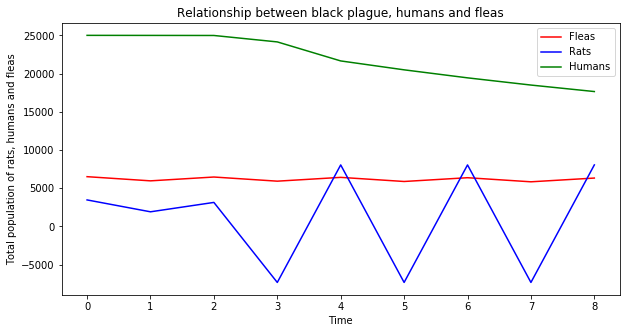

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#criando dataframe vazio
df = pd.DataFrame()

#criando as 3 colunas para armazenar os dados
colunas = ["Pulgas_T", "Ratos_T", "Humanos_T"]

df = pd.DataFrame(columns= colunas)

# Fixing random state for reproducibility
np.random.seed(19680801)
# Peste Negra

# Pulgas
Pulgas_T = 6000
Pulgas_I = 1. * Pulgas_T

# Humanos
Humanos_S = 25000
Humanos_I = 1. * 1.5
Humanos_R = 0
Humanos_M = 5
Humanos_T = Humanos_S + Humanos_I + Humanos_R

# Ratos
Ratos_S = Humanos_S * .14
Ratos_I = 15.
Ratos_R = 0
Ratos_M = 0
Ratos_T = Ratos_S + Ratos_I + Ratos_R

searching = 3. / Ratos_S

#lists to contain the new values
teste = []
teste2 = []
teste3 = []

for i in range(1, 10):

    if (i == 1):
        Pulgas_Inicio = Pulgas_T

    if (Pulgas_T / Pulgas_Inicio > 1):
        Crescimento_M = -0.084 * Pulgas_T
    else:
        Crescimento_M = 0.084 * Pulgas_T

    Pulgas_I_Iteration = Ratos_M * Pulgas_T
    Pulgas_M = 0.2 * Pulgas_I

    Pulgas_H = min(Pulgas_I, Pulgas_I * np.exp(-searching * Ratos_T))
    Pulgas_R = Pulgas_I - Pulgas_H

    Pulgas_T = Pulgas_T + Crescimento_M
    Pulgas_I = Pulgas_I + Pulgas_I_Iteration - Pulgas_M

    # Ratos
    Ratos_T = Ratos_S + Ratos_I + Ratos_R

    Ratos_I_Iteration = min(Ratos_S, .08 * Ratos_S * Pulgas_R / Ratos_T)
    Ratos_Removed = 2.0 * Ratos_I
    Ratos_R_Iteration = 0.1 * Ratos_Removed
    Death_R_Iteration = Ratos_Removed - Ratos_R_Iteration
    Ratos_M_Iteration = Death_R_Iteration

    Ratos_S = Ratos_S - Ratos_I_Iteration
    Ratos_I = Ratos_I + Ratos_I_Iteration - Ratos_Removed
    Ratos_R = Ratos_R + Ratos_R_Iteration
    Ratos_M = Ratos_M_Iteration
    Ratos_T = Ratos_S + Ratos_I + Ratos_R - Ratos_M

    # Humanos
    Humanos_T = Humanos_R + Humanos_S + Humanos_I

    Humanos_I_Iteration = min(Humanos_S, .2 * Humanos_S * Pulgas_H / Humanos_T)
    Humanos_Removed = .1 * Humanos_I
    Humanos_R_Iteration = .4 * Humanos_Removed
    Humanos_M_Iteration = Humanos_Removed - Humanos_R_Iteration

    Humanos_S = Humanos_S - Humanos_I_Iteration
    Humanos_I = Humanos_I + Humanos_I_Iteration - Humanos_Removed
    Humanos_R = Humanos_R + Humanos_R_Iteration
    Humanos_M = Humanos_M_Iteration
    Humanos_T = Humanos_R + Humanos_S + Humanos_I - Humanos_M

    teste.append(Pulgas_T)
    teste2.append(Ratos_T)
    teste3.append(Humanos_T)

   # print(round(Pulgas_T, 2), round(Ratos_T, 2), round(Humanos_T, 2))

    #print("\n");

# add the values to the Dataframe
df["Pulgas_T"] = teste
df["Ratos_T"] = teste2
df["Humanos_T"] = teste3

#print(df)

fig = plt.figure(figsize=(10,5))

plt.plot(df["Pulgas_T"],  c = "red", label = "Fleas")
plt.plot(df["Ratos_T"],  c = "blue", label = "Rats")
plt.plot(df["Humanos_T"],  c = "green", label = "Humans")

plt.legend()
plt.xlabel("Time")
plt.ylabel("Total population of rats, humans and fleas")
plt.title("Relationship between black plague, humans and fleas")

plt.show()





















